In [1]:
!pip install tensorflow==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-serve

In [2]:
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [19]:
!unzip /KneeRegionDetection.zip

Archive:  /KneeRegionDetection.zip
   creating: KneeRegionDetection/KneeImages/
  inflating: KneeRegionDetection/KneeImages/knee_image_1.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_10.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_11.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_12.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_13.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_14.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_15.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_16.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_17.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_18.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_19.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_2.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_20.png  
  inflating: KneeRegionDetection/KneeImages/knee_image_21.png  
  inflating: KneeRegionDet

In [5]:
!unzip /content/keras_applications.zip

Archive:  /content/keras_applications.zip
  inflating: keras_applications/__init__.py  
  inflating: keras_applications/densenet.py  
  inflating: keras_applications/efficientnet.py  
  inflating: keras_applications/imagenet_utils.py  
  inflating: keras_applications/inception_resnet_v2.py  
  inflating: keras_applications/inception_v3.py  
  inflating: keras_applications/mobilenet.py  
  inflating: keras_applications/mobilenet_v2.py  
  inflating: keras_applications/mobilenet_v3.py  
  inflating: keras_applications/nasnet.py  
  inflating: keras_applications/resnet.py  
  inflating: keras_applications/resnet_common.py  
  inflating: keras_applications/resnet_v2.py  
  inflating: keras_applications/resnet50.py  
  inflating: keras_applications/resnext.py  
  inflating: keras_applications/vgg16.py  
  inflating: keras_applications/vgg19.py  
  inflating: keras_applications/xception.py  


In [6]:
SIZE_X = 864
SIZE_Y = 864

In [36]:
def resize_with_black_padding(image, target_size):
    target_height, target_width = target_size
    original_height, original_width = image.shape[:2]

    # Calculate the scaling factor
    scale_factor = min(target_height / original_height, target_width / original_width)
    new_height = int(original_height * scale_factor)
    new_width = int(original_width * scale_factor)

    # Resize the image while preserving aspect ratio
    resized_image = cv2.resize(image, (new_width, new_height))

    # Create a black canvas of the target size
    if len(image.shape) == 3:  # RGB image
        canvas = np.zeros((target_height, target_width, 3), dtype=np.uint8)
    else:  # Grayscale image
        canvas = np.zeros((target_height, target_width), dtype=np.uint8)

    # Calculate the position to place the resized image
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2

    # Paste the resized image onto the canvas
    if len(image.shape) == 3:  # RGB image
        canvas[y_offset:y_offset+new_height, x_offset:x_offset+new_width, :] = resized_image
    else:  # Grayscale image
        canvas[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = resized_image

    return canvas


In [24]:
train_images = []

for directory_path in glob.glob("/content/KneeRegionDetection/KneeImages"):
    for img_path in glob.glob(os.path.join(directory_path, "knee_image_*.png")):
        img = cv2.imread(img_path)
        img = resize_with_black_padding(img, (SIZE_X, SIZE_Y))
        train_images.append(img)

train_images = np.array(train_images)
print(train_images)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [25]:
train_masks = []

for directory_path in glob.glob("/content/KneeRegionDetection/KneeLabels"):
  for mask_path in glob.glob(os.path.join(directory_path, "knee_mask_*.png")):
    mask = cv2.imread(mask_path)
    mask = resize_with_black_padding(mask, (SIZE_X, SIZE_Y))
    #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
    train_masks.append(mask)

train_masks = np.array(train_masks)
print(train_masks)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [26]:
from keras_applications import efficientnet

In [27]:
import tensorflow.keras.backend as K

def dice_coef(y_true, y_pred, smooth=1):
    y_true = tf.cast(y_true, y_pred.dtype)
    intersection = tf.reduce_sum(tf.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (tf.reduce_sum(tf.square(y_true), axis=-1) + tf.reduce_sum(tf.square(y_pred), axis=-1) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [28]:
# Convolution, Batch Normalization, Activation then Residual Connection
def CBAR_block(input, num_filters):
    x = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding='same')(input)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=3, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    xd = tf.keras.layers.Conv2D(filters=num_filters, kernel_size=1)(input)
    x = tf.keras.layers.Add()([x, xd])

    

    return x


def get_efficientnet(name='B4', input_shape=(None, None, 3)):
    return efficientnet.EfficientNetB4(
        include_top=False,
        weights='imagenet',
        input_tensor=None,
        input_shape=input_shape,
        pooling=None,
        backend=tf.keras.backend,
        layers=tf.keras.layers,
        models=tf.keras.models,
        utils=tf.keras.utils
    )



def efficientnet_unet(input_shape = (864,864,3), num_classes=1):
    encoder_model = get_efficientnet(name='B4', input_shape=input_shape)
    new_input = encoder_model.input
    # encoder output, we won't use the top_conv (which has 1280 filters)
    # let's just use 7a bn, which is 7 x 7 x 320
    encoder_output = encoder_model.get_layer(name='block7a_project_bn').output

    # filter number for the bottleneck
    fn_bottle_neck = encoder_output.shape[-1]
    bottleneck = CBAR_block(encoder_output, fn_bottle_neck)

    # Decoder block 1
    c1 = encoder_model.get_layer(name='block5c_drop').output
    fn_1 = c1.shape[-1]
    upsampling1 = tf.keras.layers.UpSampling2D()(bottleneck)
    concatenation1 = tf.keras.layers.concatenate(
            [upsampling1, c1], axis=3)
    decoder1 = CBAR_block(concatenation1, fn_1)

    # Decoder block 2
    c2 = encoder_model.get_layer(name='block3b_drop').output
    fn_2 = c2.shape[-1]
    upsampling2 = tf.keras.layers.UpSampling2D()(decoder1)
    concatenation2 = tf.keras.layers.concatenate(
            [upsampling2, c2], axis=3)
    decoder2 = CBAR_block(concatenation2, fn_2)

    # Decoder block 3
    c3 = encoder_model.get_layer(name='block2b_drop').output
    fn_3 = c3.shape[-1]
    upsampling3 = tf.keras.layers.UpSampling2D()(decoder2)
    concatenation3 = tf.keras.layers.concatenate(
            [upsampling3, c3], axis=3)
    decoder3 = CBAR_block(concatenation3, fn_3)

    # Decoder block 4
    # 1a does not have dropout
    c4 = encoder_model.get_layer(name='block1a_project_bn').output
    fn_4 = c4.shape[-1]
    upsampling4 = tf.keras.layers.UpSampling2D()(decoder3)
    concatenation4 = tf.keras.layers.concatenate(
            [upsampling4, c4], axis=3)
    decoder4 = CBAR_block(concatenation4, fn_4)

    # Decoder block 5
    # the only layer with original shape is input...
    fn_5 = fn_4 # let's resuse this filter number for now
    upsampling5 = tf.keras.layers.UpSampling2D()(decoder4)
    concatenation5 = tf.keras.layers.concatenate(
            [upsampling5, new_input], axis=3)
    decoder5 = CBAR_block(concatenation5, fn_5)

    # Now we can add in the output portion
    if num_classes == 1 or num_classes == 2:
        final_filter_num = 1
        final_activation = 'sigmoid'
    else:
        final_filter_num = num_classes
        final_activation = 'softmax'
    new_output = tf.keras.layers.Conv2D(filters=final_filter_num, kernel_size=1, activation=final_activation)(decoder5)

    print("output shape", new_output.shape)
    
    efficient_unet = tf.keras.Model(inputs=new_input, outputs=new_output)

    return efficient_unet

def main():
    model = efficientnet_unet(num_classes = 2)
    model.compile(
        loss = dice_loss, 
        optimizer = tf.keras.optimizers.Adam(1e-4),
        metrics = [dice_coef,'accuracy']
    )
    model.summary()
    model.save('EU_Test.h5')
    model_json = model.to_json()
    with open("model.json","w") as json_file:
         json_file.write(model_json)

if __name__ == "__main__":
    main()

71892840/71892840 [==============================] - 1s 0us/step
output shape (None, 864, 864, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 864, 864, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 865, 865, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 432, 432, 48  1296        ['stem_conv_pad[0][0]']          
                                )                                                              

output shape (None, 864, 864, 1)
Epoch 1/3
27/27 [==============================] - 581s 20s/step - loss: 0.0997 - dice_coef: 0.9003 - accuracy: 0.8320 - val_loss: 0.0632 - val_dice_coef: 0.9368 - val_accuracy: 0.9085
Epoch 2/3
27/27 [==============================] - 522s 19s/step - loss: 0.0355 - dice_coef: 0.9645 - accuracy: 0.9630 - val_loss: 0.0413 - val_dice_coef: 0.9587 - val_accuracy: 0.9525
Epoch 3/3
27/27 [==============================] - 520s 19s/step - loss: 0.0346 - dice_coef: 0.9654 - accuracy: 0.9650 - val_loss: 0.0388 - val_dice_coef: 0.9612 - val_accuracy: 0.9577
Training loss: 0.03459182009100914
Validation loss: 0.038750212639570236


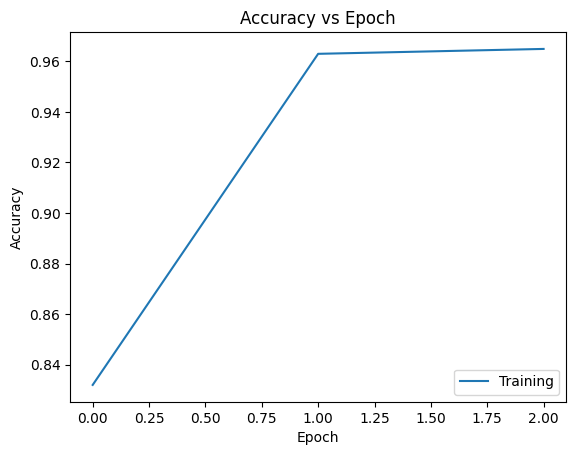

In [30]:
model = efficientnet_unet(input_shape=(864,864,3), num_classes=2)
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coef,'accuracy'])

# Train the model
history = model.fit(train_images, train_masks, epochs=3, batch_size=1, validation_split=0.1)
# Print the training and validation losses
print('Training loss:', history.history['loss'][-1])
print('Validation loss:', history.history['val_loss'][-1])

# Plot the accuracy vs epoch graph
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

1/1 [==============================] - 3s 3s/step


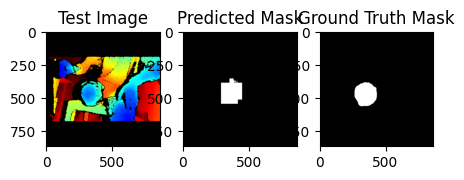

In [37]:
from PIL import Image

# Load the test image and preprocess it
test_image = np.array(Image.open('/content/KneeRegionDetection/KneeImages/knee_image_10.png'))
ground_truth_mask = np.array(Image.open('/content/KneeRegionDetection/KneeLabels/knee_mask_10.png'))
# Define the target size
target_size = (864, 864)
# Resize and pad the test_image
resized_image = resize_with_black_padding(test_image, target_size)
# Pass the test image through the trained model to obtain the predicted mask
predicted_mask = model.predict(np.expand_dims(resized_image, axis=0))[0,:,:,0]
resized_ground_truth_mask = resize_with_black_padding(ground_truth_mask, target_size)

# Visualize the test image, predicted mask, and ground truth mask (if available) in a plot
fig, axs = plt.subplots(1, 3, figsize=(5, 10))
axs[0].imshow(resized_image)
axs[0].set_title('Test Image')
axs[1].imshow(predicted_mask, cmap='gray')
axs[1].set_title('Predicted Mask')
if ground_truth_mask is not None:
    axs[2].imshow(resized_ground_truth_mask, cmap='gray')
    axs[2].set_title('Ground Truth Mask')
plt.show()

In [39]:
# Convert the predicted mask to binary
threshold = 0.5  # Adjust this threshold if necessary
binary_mask = (predicted_mask > threshold).astype(np.uint8)

# Find the coordinates of the white pixels in the binary mask
white_pixels = np.where(binary_mask == 1)

# Calculate the height and width of amputation
topmost_pixel = np.min(white_pixels[0])
bottommost_pixel = np.max(white_pixels[0])
leftmost_pixel = np.min(white_pixels[1])
rightmost_pixel = np.max(white_pixels[1])

height = bottommost_pixel - topmost_pixel
width = rightmost_pixel - leftmost_pixel

# Print the measured height and width
print("Height pixels:", height)
print("Width pixels:", width)

Height pixels: 191
Width pixels: 159


In [42]:
# Calculate the center coordinates as the average of white pixel coordinates
center_pixel = np.mean(white_pixels, axis=0, dtype=int)

# Choose the web pixel based on your criteria (e.g., topmost pixel)
web_pixel = white_pixels[np.argmin(white_pixels[:, 0])]

# Print the coordinates of the central and web pixels
print("Central Pixel Coordinates:", center_pixel)
print("Web Pixel Coordinates:", web_pixel)

Central Pixel Coordinates: [456 365]
Web Pixel Coordinates: [352 352]


In [ ]:
# Assuming you have the depth frame available as `depth_frame` (from RealSense camera) and the central pixel coordinates as `central_pixel`
central_depth = depth_frame.get_distance(central_pixel[0], central_pixel[1])

# Assuming you have the web pixel coordinates as `web_pixel`
web_depth = depth_frame.get_distance(web_pixel[0], web_pixel[1])

# Calculate the depth difference
depth_difference = abs(central_depth - web_depth)

# Print the depth difference
print("Depth Difference:", depth_difference)
